In [1]:
import scipy.stats as stats

# 문제 정보
sample_mean = 495   # 샘플 평균
pop_mean = 500      # 모집단 평균 (목표 무게)
std_dev = 10        # 표준편차
n = 25              # 샘플 개수
alpha = 0.05        # 유의수준

# t-검정 통계량 계산
t_statistic = (sample_mean - pop_mean) / (std_dev / (n ** 0.5))
p_value = stats.t.cdf(t_statistic, df=n-1)  # 좌측 검정이므로 cdf 사용

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

t-값: -2.5000, p-value: 0.0098. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


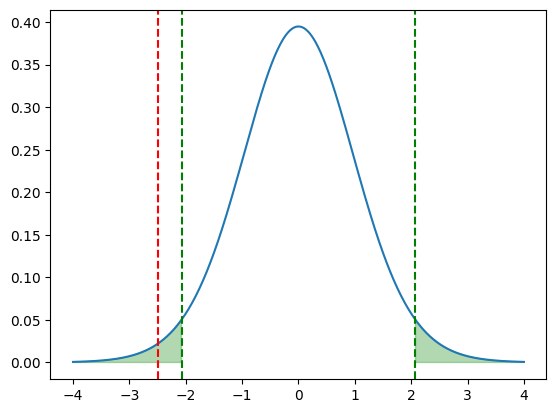

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

df = 24
alpha = 0.05
t_stat = -2.5
t_crit = t.ppf(1 - alpha / 2, df)

x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

plt.plot(x, y)
plt.axvline(t_stat, color='red', linestyle='--')
plt.axvline(-t_crit, color='green', linestyle='--')
plt.axvline(t_crit, color='green', linestyle='--')
plt.fill_between(x, y, where=(x < -t_crit) | (x > t_crit), color='green', alpha=0.3)
plt.show()

In [23]:
from scipy.stats import ttest_ind, levene

# 그룹 A, B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 등분산 검정
stat, p_var = levene(group_A, group_B)
equal_var = p_var >= 0.05  # p_var가 0.05 이상이면 등분산 가정 O

# 독립표본 t-test
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=equal_var)

# 결과 출력
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다.")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다.


In [24]:
import numpy as np
from scipy.stats import ttest_rel

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 대응표본 t-검정
t_stat, p_value = ttest_rel(before, after)

# 결과 출력
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다.


In [29]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

100%|██████████| 14.5M/14.5M [00:01<00:00, 10.4MB/s]

Extracting files...


Path to dataset files: C:\Users\shoot\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [31]:
import pandas as pd

# Step 1: TotalPrice 계산
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

# Step 2: 영국 데이터 필터링
uk = retail[retail['Country'] == 'United Kingdom']
uk_total = uk['TotalPrice'].dropna()

# Step 3: 모집단 평균 출력
population_mean = round(uk_total.mean(), 2)
print(f"Population Mean TotalPrice (UK): {population_mean}")

# Step 4: 표본 평균 추정
for size in [30, 100, 300]:
    sample = uk_total.sample(size, random_state=42)
    sample_mean = round(sample.mean(), 2)
    print(f"Sample size: {size}, Mean TotalPrice: {sample_mean}")

Population Mean TotalPrice (UK): 16.69
Sample size: 30, Mean TotalPrice: 11.88
Sample size: 100, Mean TotalPrice: 16.09
Sample size: 300, Mean TotalPrice: 13.34


In [32]:
import scipy.stats as stats

# 신뢰구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기별 신뢰구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_total.sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.37841466090658), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


In [33]:
from scipy.stats import ttest_ind

# 국가별 TotalPrice 정의
uk_total = retail[retail['Country'] == 'United Kingdom']['Quantity'] * retail[retail['Country'] == 'United Kingdom']['Price']
germany_total = retail[retail['Country'] == 'Germany']['Quantity'] * retail[retail['Country'] == 'Germany']['Price']

# 결측치 제거
uk_total = uk_total.dropna()
germany_total = germany_total.dropna()

# 독립표본 t-검정 (등분산 가정)
t_stat, p_value = ttest_ind(uk_total, germany_total, equal_var=True)

# 결과 출력
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


### 9번.페이지 B가 전환율은 더 높은데, 데이터가 적어서 확실하진 않아요. 일단은 더 실험해보거나, 리스크 적으면 B로 가보는 것도 나쁘진 않을 것 같습니다.

### 10번. 통계적으로 차이가 있다고 해도, 실제로 별 효과 없으면 굳이 안 바꿀 수도 있을 것 같습니다다.반대로 바꾸는 게 쉽고 싸면, 그냥 적용해보는 것도 괜찮다고 생각을 해봅니다.

### 회고: 개인적으로 이번 프로젝트는 힘든 시간이였습니다. 1일차 통계 프로젝트는 제가 평소에 개별적으로 가지고 연습을 했던 데이터와 많이 달라 전처리를 잘 하지 못했어요 저번 미니 프로젝트 때는 그래도 가이드라인이 있어 스스로 많이 해볼 수 있었지만 이번엔 90% 이상 지피티의 도움을 받았어요 통계가 중요하고 많이 부족하다는 것을 알지만 그래도 저에겐 다른 우선 순위가 있기 때문에 당장 앞으로도 그 부분을 우선적으로 채워 나가려고 할 것 같습니다. 항상 미니프로젝트를 할 때마다 수준에 대해 부족함을 느끼고 여전히 해야할 일이 많다고 느껴집니다. 그리고 추가로 통계 강의가 끝나 너무 신이납니다.